# Optimistic Rollup 与 Zk-Rollup 的 gas 对比分析

首先将测试跑出来的数据读进代码中。

In [23]:
# 读取数据
import pandas as pd

arb721 = pd.read_csv('./data/arb_sepolia_721.csv')
# print(data.head())
avg_mint_gas_arb721 = arb721['mint gas'].mean()
avg_trade_gas_arb721 = arb721['trade gas'].mean()
avg_cross_chain_fee_arb721 = arb721['cross chain fee'].mean()

# print('arb_sepolia_721.csv')
# print('mint_gas: ', avg_mint_gas_arb7)
# print('trade_gas: ', avg_trade_gas_arb7)
# print('cross_chain_fee: ', avg_cross_chain_fee_arb7)

arb1155 = pd.read_csv('./data/arb_sepolia_1155.csv')
avg_mint_gas_arb1155 = arb1155['mint gas'].mean()
avg_trade_gas_arb1155 = arb1155['trade gas'].mean()
avg_cross_chain_fee_arb1155 = arb1155['cross chain fee'].mean()

base721 = pd.read_csv('./data/base_sepolia_721.csv')
avg_mint_gas_base721 = base721['mint gas'].mean()
avg_trade_gas_base721 = base721['trade gas'].mean()
avg_cross_chain_fee_base721 = base721['cross chain fee'].mean()

base1155 = pd.read_csv('./data/base_sepolia_1155.csv')
avg_mint_gas_base1155 = base1155['mint gas'].mean()
avg_trade_gas_base1155 = base1155['trade gas'].mean()
avg_cross_chain_fee_base1155 = base1155['cross chain fee'].mean()

linea721 = pd.read_csv('./data/linea_goerli_721.csv')
avg_mint_gas_linea721 = linea721['mint gas'].mean()
avg_trade_gas_linea721 = linea721['trade gas'].mean()
avg_cross_chain_fee_linea721 = linea721['cross chain fee'].mean()

linea1155 = pd.read_csv('./data/linea_goerli_1155.csv')
avg_mint_gas_linea1155 = linea1155['mint gas'].mean()
avg_trade_gas_linea1155 = linea1155['trade gas'].mean()
avg_cross_chain_fee_linea1155 = linea1155['cross chain fee'].mean()

op721 = pd.read_csv('./data/op_sepolia_721.csv')
avg_mint_gas_op721 = op721['mint gas'].mean()
avg_trade_gas_op721 = op721['trade gas'].mean()
avg_cross_chain_fee_op721 = op721['cross chain fee'].mean()

op1155 = pd.read_csv('./data/op_sepolia_1155.csv')
avg_mint_gas_op1155 = op1155['mint gas'].mean()
avg_trade_gas_op1155 = op1155['trade gas'].mean()
avg_cross_chain_fee_op1155 = op1155['cross chain fee'].mean()

scroll721 = pd.read_csv('./data/scroll_sepolia_721.csv')
avg_mint_gas_scroll721 = scroll721['mint gas'].mean()
avg_trade_gas_scroll721 = scroll721['trade gas'].mean()
avg_cross_chain_fee_scroll721 = scroll721['cross chain fee'].mean()

scroll1155 = pd.read_csv('./data/scroll_sepolia_1155.csv')
avg_mint_gas_scroll1155 = scroll1155['mint gas'].mean()
avg_trade_gas_scroll1155 = scroll1155['trade gas'].mean()
avg_cross_chain_fee_scroll1155 = scroll1155['cross chain fee'].mean()

zkevm721 = pd.read_csv('./data/zkevm_sepolia_721.csv')
avg_mint_gas_zkevm721 = zkevm721['mint gas'].mean()
avg_trade_gas_zkevm721 = zkevm721['trade gas'].mean()
avg_cross_chain_fee_zkevm721 = zkevm721['cross chain fee'].mean()

zkevm1155 = pd.read_csv('./data/zkevm_sepolia_1155.csv')
avg_mint_gas_zkevm1155 = zkevm1155['mint gas'].mean()
avg_trade_gas_zkevm1155 = zkevm1155['trade gas'].mean()
avg_cross_chain_fee_zkevm1155 = zkevm1155['cross chain fee'].mean()

mint_gas = [avg_mint_gas_arb721, avg_mint_gas_arb1155, avg_mint_gas_base721, avg_mint_gas_base1155, avg_mint_gas_op721, avg_mint_gas_op1155, avg_mint_gas_linea721, avg_mint_gas_linea1155, avg_mint_gas_scroll721, avg_mint_gas_scroll1155, avg_mint_gas_zkevm721, avg_mint_gas_zkevm1155]
trade_gas = [avg_trade_gas_arb721, avg_trade_gas_arb1155, avg_trade_gas_base721, avg_trade_gas_base1155, avg_trade_gas_op721, avg_trade_gas_op1155, avg_trade_gas_linea721, avg_trade_gas_linea1155, avg_trade_gas_scroll721, avg_trade_gas_scroll1155, avg_trade_gas_zkevm721, avg_trade_gas_zkevm1155]
cross_chain_fee = [avg_cross_chain_fee_arb721, avg_cross_chain_fee_arb1155, avg_cross_chain_fee_base721, avg_cross_chain_fee_base1155, avg_cross_chain_fee_op721, avg_cross_chain_fee_op1155, avg_cross_chain_fee_linea721, avg_cross_chain_fee_linea1155, avg_cross_chain_fee_scroll721, avg_cross_chain_fee_scroll1155, avg_cross_chain_fee_zkevm721, avg_cross_chain_fee_zkevm1155]

利用上述数据绘制图像。

1. 不同协议的 NFT 对比图。

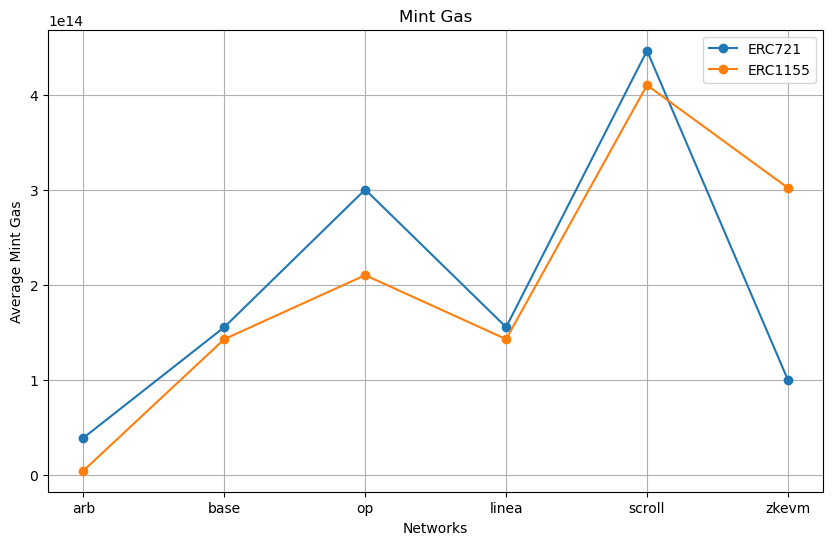

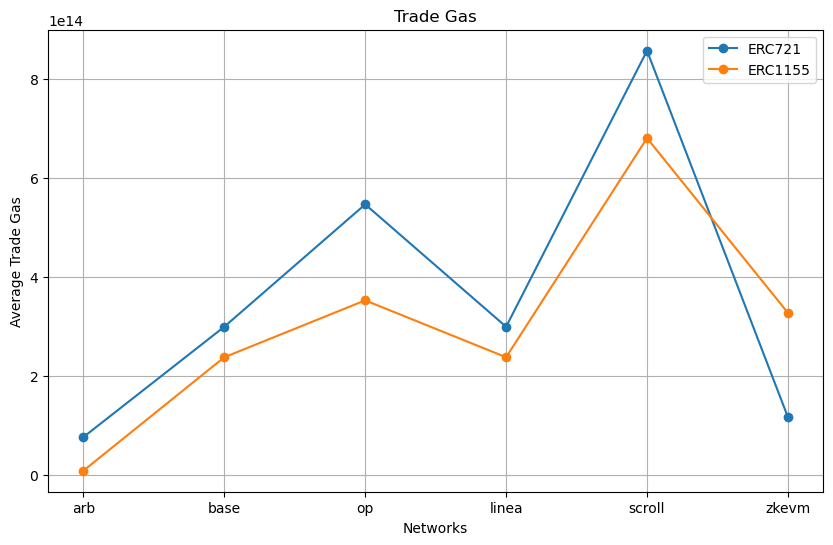

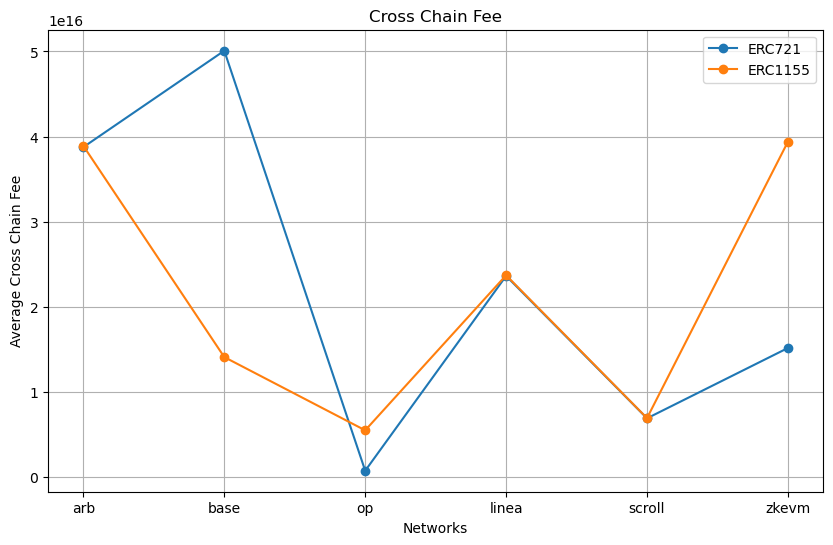

In [35]:
import matplotlib.pyplot as plt

# 提取不同网络的数据
networks = ['arb', 'base', 'op', 'linea', 'scroll', 'zkevm']
mint_gas_721 = [mint_gas[i] for i in range(0, len(mint_gas), 2)]
mint_gas_1155 = [mint_gas[i] for i in range(1, len(mint_gas), 2)]
trade_gas_721 = [trade_gas[i] for i in range(0, len(trade_gas), 2)]
trade_gas_1155 = [trade_gas[i] for i in range(1, len(trade_gas), 2)]
cross_chain_fee_721 = [cross_chain_fee[i] for i in range(0, len(cross_chain_fee), 2)]
cross_chain_fee_1155 = [cross_chain_fee[i] for i in range(1, len(cross_chain_fee), 2)]

# 画图
plt.figure(figsize=(10, 6))

# mint gas
plt.plot(networks, mint_gas_721, marker='o', label='ERC721', linestyle='-')
plt.plot(networks, mint_gas_1155, marker='o', label='ERC1155', linestyle='-')
plt.title('Mint Gas')
plt.xlabel('Networks')
plt.ylabel('Average Mint Gas')
plt.legend()
plt.grid(True)
plt.show()

# trade gas
plt.figure(figsize=(10, 6))
plt.plot(networks, trade_gas_721, marker='o', label='ERC721', linestyle='-')
plt.plot(networks, trade_gas_1155, marker='o', label='ERC1155', linestyle='-')
plt.title('Trade Gas')
plt.xlabel('Networks')
plt.ylabel('Average Trade Gas')
plt.legend()
plt.grid(True)
plt.show()

# cross chain fee
plt.figure(figsize=(10, 6))
plt.plot(networks, cross_chain_fee_721, marker='o', label='ERC721', linestyle='-')
plt.plot(networks, cross_chain_fee_1155, marker='o', label='ERC1155', linestyle='-')
plt.title('Cross Chain Fee')
plt.xlabel('Networks')
plt.ylabel('Average Cross Chain Fee')
plt.legend()
plt.grid(True)
plt.show()

2. 不同 Rollup 费用对比图。

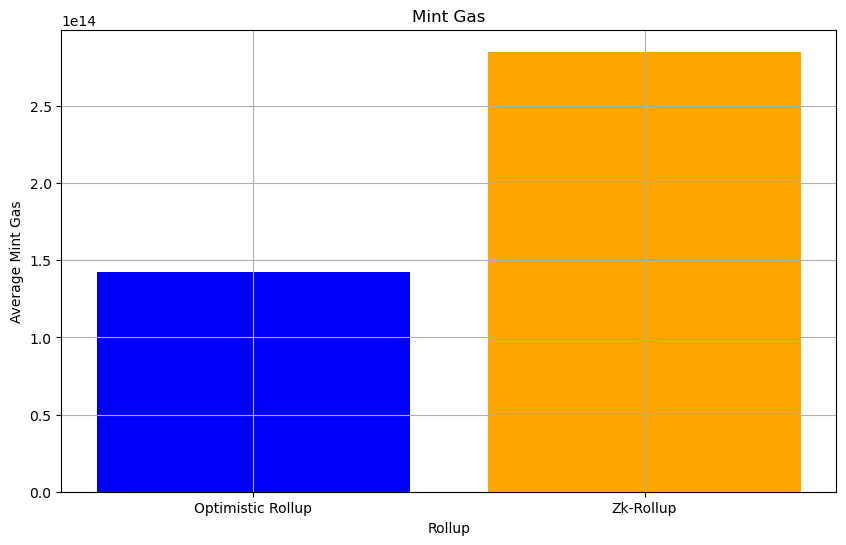

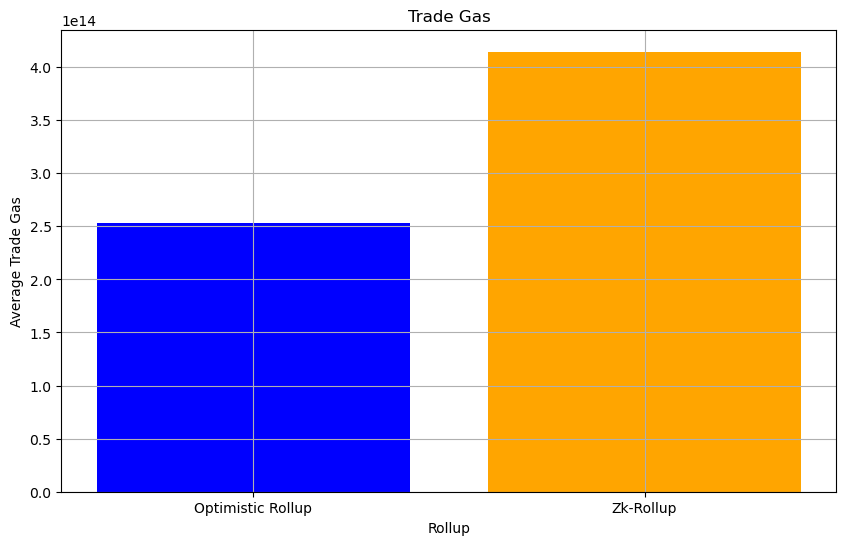

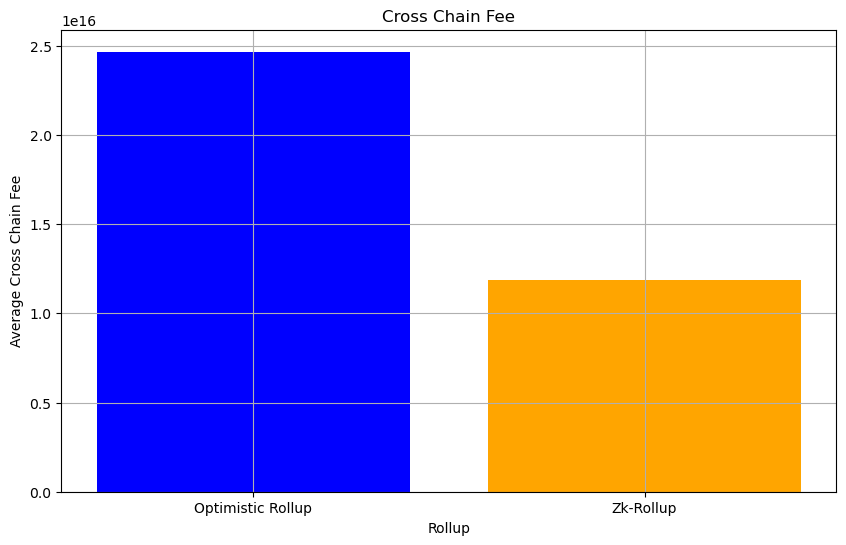

In [36]:
# 计算新的平均值
avg_optimistic_rollup_mint_gas = sum(mint_gas_721[:3] + mint_gas_1155[:3]) / 6
avg_optimistic_rollup_trade_gas = sum(trade_gas_721[:3] + trade_gas_1155[:3]) / 6
avg_optimistic_rollup_cross_chain_fee = sum(cross_chain_fee_721[:3] + cross_chain_fee_1155[:3]) / 6

avg_zk_rollup_mint_gas = sum(mint_gas_1155[3:] + mint_gas_1155[3:]) / 6
avg_zk_rollup_trade_gas = sum(trade_gas_1155[3:] + trade_gas_1155[3:]) / 6
avg_zk_rollup_cross_chain_fee = sum(cross_chain_fee_1155[3:] + trade_gas_1155[3:]) / 6

# 画图
plt.figure(figsize=(10, 6))

# mint gas
plt.bar(['Optimistic Rollup', 'Zk-Rollup'], [avg_optimistic_rollup_mint_gas, avg_zk_rollup_mint_gas], color=['blue', 'orange'])
plt.title('Mint Gas')
plt.xlabel('Rollup')
plt.ylabel('Average Mint Gas')
plt.grid(True)
plt.show()

# trade gas
plt.figure(figsize=(10, 6))
plt.bar(['Optimistic Rollup', 'Zk-Rollup'], [avg_optimistic_rollup_trade_gas, avg_zk_rollup_trade_gas], color=['blue', 'orange'])
plt.title('Trade Gas')
plt.xlabel('Rollup')
plt.ylabel('Average Trade Gas')
plt.grid(True)
plt.show()

# cross chain fee
plt.figure(figsize=(10, 6))
plt.bar(['Optimistic Rollup', 'Zk-Rollup'], [avg_optimistic_rollup_cross_chain_fee, avg_zk_rollup_cross_chain_fee], color=['blue', 'orange'])
plt.title('Cross Chain Fee')
plt.xlabel('Rollup')
plt.ylabel('Average Cross Chain Fee')
plt.grid(True)
plt.show()